**Migration - Tax Change** :

It will helpful in tax liability to know increase or decrease due to migration . aama current year - previous year na tax liability nu difference nikadine binary classification kariyuche ke increase thay ke nai (classification)

In [2]:
import pandas as pd
import numpy as np

file_path= "/content/Residence-Beginning-Tax-USA (1).csv"
df = pd.read_csv(file_path)
print("Loaded Shape:", df.shape)

Loaded Shape: (23735, 17)


Data Attributes Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tax Year                             23735 non-null  int64  
 1   Resident Type                        23735 non-null  object 
 2   Place of Residence                   23735 non-null  object 
 3   Country                              23735 non-null  object 
 4   State                                23735 non-null  object 
 5   County                               23735 non-null  object 
 6   Income Class                         23735 non-null  object 
 7   Disclosure                           296 non-null    object 
 8   Number of All Returns                23439 non-null  float64
 9   NY AGI of All Returns                23439 non-null  float64
 10  Deductions of All Returns            23439 non-null  float64
 11  Dependent Exemptions of All 

In [4]:
df.drop(columns=['Disclosure'], inplace=True)
df.columns

Index(['Tax Year', 'Resident Type', 'Place of Residence', 'Country', 'State',
       'County', 'Income Class', 'Number of All Returns',
       'NY AGI of All Returns', 'Deductions of All Returns',
       'Dependent Exemptions of All Returns', 'Taxable Income of All Returns',
       'Tax Before Credits of All Returns', 'Tax Liability of All Returns',
       'Place of Residence Sort Order', 'Income Class Sort Order'],
      dtype='object')

In [5]:
df = df[df["Income Class"] != "Total"]
df["Income Class"].unique()

array(['40,000 - 49,999', '50,000 - 59,999', '60,000 - 74,999',
       'Under 5,000', '5,000 - 9,999', '10,000 - 19,999',
       '20,000 - 29,999', '30,000 - 39,999', '75,000 - 99,999',
       '100,000 - 199,999', '200,000 - 249,999', '250,000 - 499,999',
       '500,000 and over', '200,000 and over'], dtype=object)

Dropeed Irrelevant Records from Income Class Column

In [6]:
unknown_map = {
    "Residence Unknown ++++": "Unknown",
    "Residence Unknown ++": "Unknown",
    "Residence Unknown": "Unknown",
    "NYS Unclassified +": "Unknown",
    "Not Applicable": "Unknown",
    "All": "Unknown",
    "All Other Countries +++": "Unknown",
    "All Other Countries": "Unknown",
    "Other Countries": "Unknown",
    "All Other States": "Unknown"
}

for col in ["Place of Residence", "Country", "County"]:
    df[col] = df[col].replace(unknown_map)

grand_total_rows = df["Place of Residence"].str.contains("Grand Total", na=False) | \
                   df["County"].str.contains("Grand Total", na=False)
df = df[~grand_total_rows].copy()

nyc_map = {
    "New York City - Richmond": "Richmond",
    "New York City - Kings": "Kings",
    "New York City - Queens": "Queens",
    "New York City - Bronx": "Bronx",
    "New York City - Manhattan": "Manhattan"
}

for col in ["Place of Residence", "County"]:
    df[col] = df[col].replace(nyc_map)

df["Place of Residence"] = df["Place of Residence"].str.strip()
df["Country"] = df["Country"].str.strip()
df["County"] = df["County"].str.strip()


print("Place of Residence:", df["Place of Residence"].unique())
print("")
print("Country:", df["Country"].unique())
print("")
print("County:", df["County"].unique())

Place of Residence: ['Ireland' 'A.P.O./F.P.O' 'Canada' 'India' 'Mexico' 'China' 'France'
 'Germany' 'Israel' 'Italy' 'Japan' 'Puerto Rico' 'S. Korea'
 'United Kingdom' 'Unknown' 'Utah' 'Orleans' 'Nevada' 'Hamilton'
 'Washington' 'Dutchess' 'Richmond' 'Clinton' 'Onondaga' 'Texas' 'Ulster'
 'Livingston' 'New Jersey' 'Kings' 'Westchester' 'Orange' 'Cortland'
 'Ontario' 'Oswego' 'Sullivan' 'Rockland' 'Missouri' 'Delaware' 'Oregon'
 'Fulton' 'Schoharie' 'Genesee' 'Seneca' 'Albany' 'Manhattan' 'Columbia'
 'Chautauqua' 'Schuyler' 'Wayne' 'Tioga' 'Chemung' 'Wyoming' 'Rensselaer'
 'California' 'New Hampshire' 'Herkimer' 'Rhode Island' 'Allegany'
 'Colorado' 'Monroe' 'Wisconsin' 'Jefferson' 'St. Lawrence' 'Montgomery'
 'Putnam' 'Illinois' 'Virginia' 'Ohio' 'Montana' 'Franklin' 'Alabama'
 'Saratoga' 'Maine' 'Mississippi' 'Queens' 'North Carolina' 'Niagara'
 'Kansas' 'District of Columbia' 'Pennsylvania' 'Oneida' 'Schenectady'
 'Minnesota' 'Michigan' 'Massachusetts' 'Tompkins' 'Nebraska' 'Greene'


Replaced Irrelevant Data with new names

In [7]:
df.isnull().sum()

,0
Tax Year,0
Resident Type,0
Place of Residence,0
Country,0
State,0
County,0
Income Class,0
Number of All Returns,296
NY AGI of All Returns,296
Deductions of All Returns,296


In [8]:
df = df.dropna()

In [9]:
df.describe()

,Tax Year,Number of All Returns,NY AGI of All Returns,Deductions of All Returns,Dependent Exemptions of All Returns,Taxable Income of All Returns,Tax Before Credits of All Returns,Tax Liability of All Returns,Place of Residence Sort Order,Income Class Sort Order
count,21047.000000,21047.000000,2.104700e+04,2.104700e+04,21047.000000,2.104700e+04,2.104700e+04,2.104700e+04,21047.000000,21047.000000
mean,2007.218036,6968.401055,5.890071e+05,8.904642e+04,3903.094550,4.825830e+05,3.318026e+04,2.250855e+04,78.045660,6.546539
std,4.624555,18230.221283,3.257493e+06,2.652460e+05,11853.252257,2.985918e+06,2.295874e+05,1.928409e+05,58.743184,3.541678
min,1999.000000,0.000000,-5.528097e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.162910e+05,1.000000,1.000000
25%,2003.000000,182.000000,8.682500e+03,2.346500e+03,35.000000,3.625000e+03,1.730000e+02,2.600000e+01,29.000000,3.000000
50%,2008.000000,1255.000000,5.995800e+04,1.488100e+04,338.000000,3.552700e+04,1.959000e+03,7.930000e+02,56.000000,6.000000
75%,2011.000000,4164.000000,2.021945e+05,4.653200e+04,2115.000000,1.358215e+05,8.020500e+03,5.311000e+03,124.000000,10.000000
max,2014.000000,206505.000000,1.247869e+08,1.048126e+07,130161.000000,1.198454e+08,9.889252e+06,9.350728e+06,214.000000,13.000000


Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
clustering_features = [
    "Number of All Returns",
    "NY AGI of All Returns",
    "Deductions of All Returns",
    "Dependent Exemptions of All Returns",
    "Taxable Income of All Returns",
    "Tax Before Credits of All Returns",
    "Tax Liability of All Returns"
]

Features Used for Clustering

- Number of All Returns – volume of tax filings in each group

- NY AGI of All Returns – total Adjusted Gross Income

- Deductions of All Returns – total deductions claimed

- Dependent Exemptions of All Returns – dependency-related exemptions

- Taxable Income of All Returns – income subject to tax

- Tax Before Credits of All Returns – raw tax liability before credits

- Tax Liability of All Returns – final tax owed after credits

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[clustering_features])

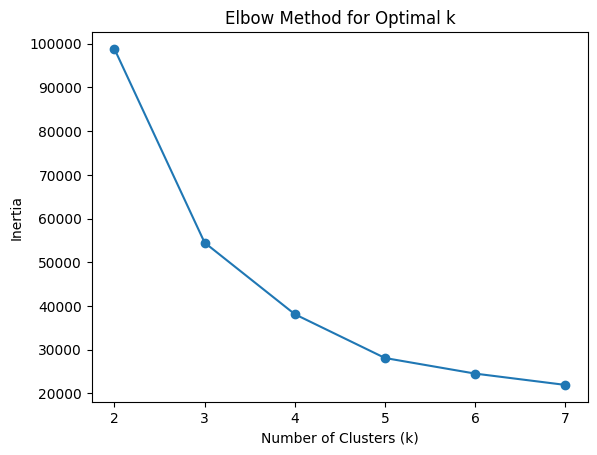

In [15]:
inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

Cluster 0 — Low Income, Low Tax, Small Population Group

Cluster 1 — Super-High Income, Extreme Tax Liabilities (Ultra-Rich Group)

Cluster 2 — Medium Income, Moderate Tax (Middle-Class Cluster)

Cluster 3 — High Income but Volatile (Migrator/Business Cluster)

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster_Label"] = kmeans.fit_predict(X_scaled)

In [18]:
grp = df.groupby(["Place of Residence", "Income Class"])["Tax Year"].nunique().reset_index(name="n_years")
valid_keys = grp[grp["n_years"] >= 2][["Place of Residence", "Income Class"]]
df_filtered = df.merge(valid_keys.assign(_keep=1), on=["Place of Residence", "Income Class"],how="left")
df_filtered = df_filtered[df_filtered["_keep"] == 1].drop(columns=["_keep"])

- Group data by Place of Residence + Income Class

- Count how many distinct Tax Years each group has

- Keep only groups with 2+ years (needed for year-over-year comparison)

- Remove all single-year groups from the dataset

This ensures we can safely compute previous-year tax, tax change, and the binary increase flag, giving a clean and valid dataset for machine learning.

In [19]:
df_sorted = df_filtered.sort_values(["Place of Residence", "Income Class", "Tax Year"]).copy()
df_sorted["Prev_Tax_Liability"] = df_sorted.groupby(["Place of Residence", "Income Class"])["Tax Liability of All Returns"].shift(1)

The data is first sorted by
Place of Residence → Income Class → Tax Year
so each group appears in correct chronological order.

Within each group, shift(1) moves the tax values down by one row, creating a column that represents the previous year's tax liability.

The first year of each group gets NaN (no previous year),
and all other years correctly receive the tax from the year before.

This step prepares the data for computing the actual Tax Change value.

In [20]:
df_sorted["Tax_Change"] = (df_sorted["Tax Liability of All Returns"] - df_sorted["Prev_Tax_Liability"])
df_final = df_sorted.dropna(subset=["Prev_Tax_Liability"]).copy()
df_final["Tax_Increase_Flag"] = (df_final["Tax_Change"] > 0).astype(int)

Tax_Change is calculated as the difference between the current year’s tax and the previous year’s tax.

Rows where no previous-year tax exists (first year in each group) are removed.

Tax_Increase_Flag converts the change into a binary label:

1 = tax increased

0 = tax stayed the same or decreased

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
df_model = df_final.copy()
categorical_cols = ["Place of Residence", "Income Class", "Country","State", "County", "Resident Type"]

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

feature_cols = [
    "Place of Residence", "Income Class", "Country", "State",
    "County", "Resident Type", "Tax Year",
    "Number of All Returns", "NY AGI of All Returns",
    "Deductions of All Returns", "Dependent Exemptions of All Returns",
    "Taxable Income of All Returns", "Tax Before Credits of All Returns",
    "Prev_Tax_Liability", "Cluster_Label"
]

X = df_model[feature_cols]
y = df_model["Tax_Increase_Flag"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression Model

In [23]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nReport:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.5878552971576227

Report:
               precision    recall  f1-score   support

           0       0.66      0.32      0.43      1891
           1       0.56      0.84      0.68      1979

    accuracy                           0.59      3870
   macro avg       0.61      0.58      0.55      3870
weighted avg       0.61      0.59      0.56      3870



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nReport:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.7067183462532299

Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      1891
           1       0.71      0.72      0.72      1979

    accuracy                           0.71      3870
   macro avg       0.71      0.71      0.71      3870
weighted avg       0.71      0.71      0.71      3870



Random Forest Classifier

In [25]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nReport:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7304909560723514

Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1891
           1       0.73      0.75      0.74      1979

    accuracy                           0.73      3870
   macro avg       0.73      0.73      0.73      3870
weighted avg       0.73      0.73      0.73      3870



XGBClassifier

In [26]:
xgb_basic = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

xgb_basic.fit(X_train, y_train)

y_pred_xgb = xgb_basic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nReport:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7813953488372093

Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1891
           1       0.78      0.80      0.79      1979

    accuracy                           0.78      3870
   macro avg       0.78      0.78      0.78      3870
weighted avg       0.78      0.78      0.78      3870



Hyperparametr tunning

In [27]:

xgb_tuned = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=400,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_tuned.fit(X_train, y_train)

y_pred_tuned = xgb_tuned.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Tuned XGBoost Accuracy: 0.7801033591731266

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1891
           1       0.77      0.80      0.79      1979

    accuracy                           0.78      3870
   macro avg       0.78      0.78      0.78      3870
weighted avg       0.78      0.78      0.78      3870


Confusion Matrix:
 [[1429  462]
 [ 389 1590]]


Tax Increase Rate by Cluster

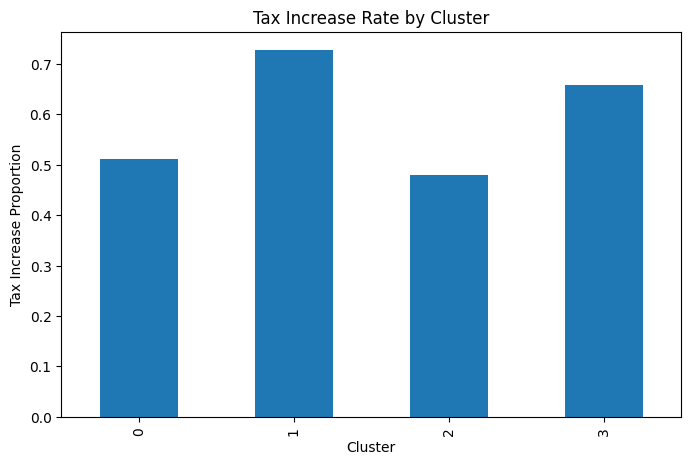

In [31]:
cluster_change = df_final.groupby("Cluster_Label")["Tax_Increase_Flag"].mean()

cluster_change.plot(kind="bar", figsize=(8,5))
plt.title("Tax Increase Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Tax Increase Proportion")
plt.show()


Distribution of Tax Change (Without Outliers)

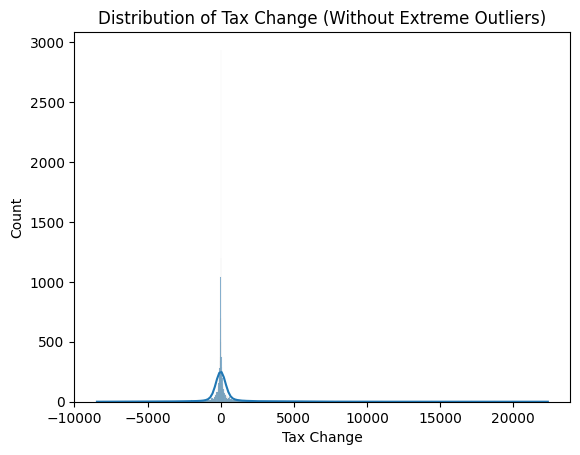

In [33]:
import numpy as np

lower = np.percentile(df_final["Tax_Change"], 1)
upper = np.percentile(df_final["Tax_Change"], 99)

sns.histplot(
    df_final[(df_final["Tax_Change"] >= lower) & (df_final["Tax_Change"] <= upper)]["Tax_Change"],
    kde=True
)

plt.title("Distribution of Tax Change (Without Extreme Outliers)")
plt.xlabel("Tax Change")
plt.ylabel("Count")
plt.show()


Feature Importance

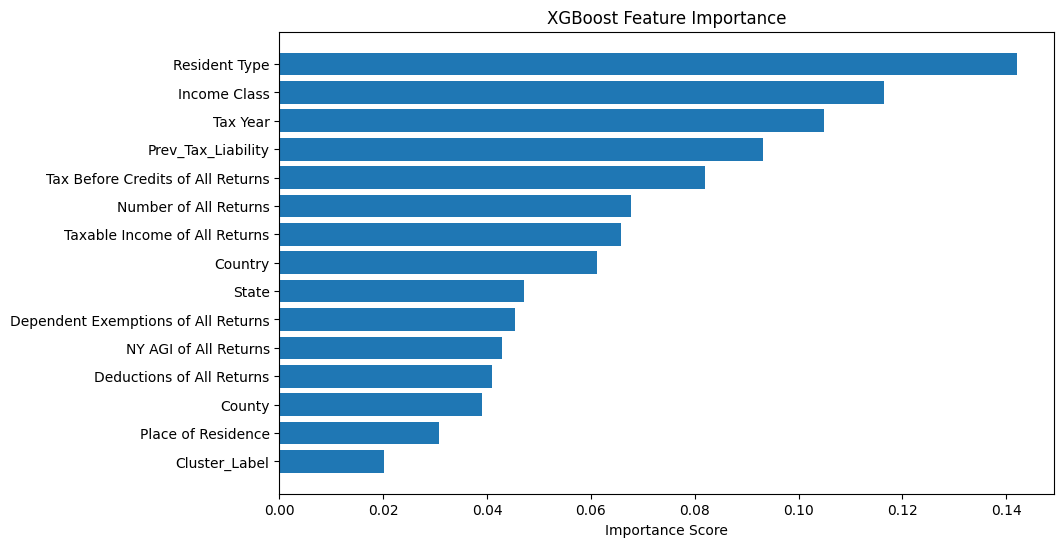

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# get feature importance values
importance = xgb_tuned.feature_importances_
features = X_train.columns

# create a dataframe
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()